In [1]:
"""
requirements:
 pip install pandas janome nlpplot matplotlib plotly
"""
import pandas as pd
import nlplot
import pandas as pd
import plotly
from plotly.subplots import make_subplots
from plotly.offline import iplot
import matplotlib.pyplot as plt

import word_wakati as wkt

In [2]:
df = pd.read_csv('Dataset.csv')
df.head()

,年度,学科／研究科,研究室,学籍番号,賞,氏名,要旨,題目
0,H17,情報科学科,相研,02JK001,NaN,青木雄司,NaN,WEBページにおけるユーザビリティの追及
1,H17,情報科学科,松永研,02JK002,NaN,青柳茂樹,NaN,安全運転管理教育システム(ASSIST)における複数カメラ使用での交通事故防止対策
2,H17,情報科学科,宮崎研,02JK003,NaN,芦刈綾子,NaN,電子透かしの体制に関する検討 -加重平均フィルタ・メディアンフィルタの場合-
3,H17,情報科学科,成研,02JK005,NaN,足達祐治,NaN,対面教育を支援するためのウェブ助言システム
4,H17,情報科学科,石田健研,02JK006,NaN,安部弘治,NaN,衛星通信検討のための気象データの解析-2002年のデータ解析-


In [3]:
years = df["年度"].unique()
y, d = 5, 2 # loop for every 'y' years
for i in range(0,len(years)-y, d):
    print(years[i],years[i+y],)

H17 H22
H19 H24
H21 H26
H23 H28
H25 H30
H27 R02
H29 R04


In [4]:
len(df)

2148

In [5]:
fake_lab={'成研': 'A研', '石田健研': 'B研', '仲研': 'C研', '澤田研': 'D研', 
          '稲永研': 'E研', '合志研': 'F研', '米元研': 'G研', '朝廣研': 'H研', 
          '下川研': 'M研', '安部研': 'N研', 'アプドゥハン研': 'P研', '田中研': 'Q研', '安武研': 'R研'}
print(fake_lab.values())

dict_values(['A研', 'B研', 'C研', 'D研', 'E研', 'F研', 'G研', 'H研', 'M研', 'N研', 'P研', 'Q研', 'R研'])


# various graphs
- themeriver graph (mathplotlib.stackplots)
- knowledge structure graph

In [6]:
import importlib
importlib.reload(wkt)
mecab = wkt.create_parser(worker='mecab', parts_of_speech=['名詞','動詞','形容詞'])
janome = wkt.create_parser(worker='janome', parts_of_speech=['名詞','動詞','形容詞'])
text = '拡張現実感のための実物体の奥行きを考慮した陰面消去'
rs_j = wkt.word_seq(text,parser=janome)
rs_m = wkt.word_seq(text,parser=mecab)
print(rs_j)
print(rs_m)

['拡張', '現実', '感', 'ため', '物体', '奥行き', '考慮', 'する', '陰', '面', '消去']
['拡張現実', '感', 'ため', '物体', '奥行き', '考慮', 'した陰', '面', '消去']


In [7]:
text = '研究室配属における学生の研究室に対する理解を深める情報共有システム'
rs_j = wkt.word_seq(text,parser=janome)
rs_m = wkt.word_seq(text,parser=mecab)
print(rs_j)
print(rs_m)

['研究', '室', '配属', '学生', '研究', '室', '理解', '深める', '情報', '共有', 'システム']
['研究室', '配属', '学生', '研究室', '理解', '深める', '情報共有', 'システム']


In [8]:
%matplotlib inline
import importlib
importlib.reload(wkt)

targets = ['動詞', '名詞', '形容詞'] #評価対象にする品詞
ignores = ['－', '～', '-', '(', ')', '---', '.','する','ため','用いる','有する','用','使う'] #無視する記号や単語
mecab  = wkt.create_parser(worker='mecab',  parts_of_speech=targets, stop_words=ignores)

In [9]:
import collections

def ngram(words, n):
    lists = []
    m = len(words)
    if m > n:
        for i in range(n):
            lists += [ words[i:m-i+n] ]
        glist = list(zip(*lists))
    else:
        glist = words
        
    return [" ".join(g) for g in glist]

ngram(['a','b', 'c', 'g'], 3)

['a b c', 'b c g']

In [10]:
def topk(i, j, topn, lab="研", stopwords=0):
    y1, y2 = years[i],years[j]
    df1 = None
    df1 = df[(df['研究室'].str.contains(lab)) & (df['年度']>=y1) & (df['年度']<=y2)]
    titles =  [ t[0] for t in df1.loc[:,['題目']].values]
    freq = collections.defaultdict(int)
    for text in titles:
        words = wkt.word_seq(text, parser=mecab)
        glist = ngram(words, 2)
#         print(glist)
        for g in glist:
            freq[g] += 1 
    freq = sorted(freq.items(), key=lambda x: x[1], reverse=True)   
    return freq[stopwords:topn+stopwords]

In [11]:
k, s, b = 60, 2, '研' 
d = 3

i = 0
top10 = topk(i, i+d, k,lab=b, stopwords=s)
top1 = dict(top10)
print(years[i],' ~ ',years[i+d])
print(top10)

i = 7
top10 = topk(i, i+d, k,lab=b, stopwords=s)
top2 = dict(top10)
print(years[i],' ~ ',years[i+d])
print(top10)

i=14
top10 = topk(i,i+d,k,lab=b,stopwords=s)
top3 = dict(top10)
print(years[i],' ~ ',years[i+d])
print(top10)


H17  ~  H20
[('安全運転 管理教育', 20), ('管理教育 システム', 20), ('システム ASSIST', 20), ('ドライビング シミュレータ', 16), ('管理 システム', 16), ('ソフトウェア 開発', 14), ('システム 構築', 13), ('交通 標識', 11), ('衛星 通信', 9), ('問題 メタヒューリスティクス', 9), ('メタヒューリスティクス 実験的', 9), ('実験的 解析', 9), ('システム開発 演習', 9), ('データ 解析', 8), ('システム 試作', 8), ('組合せ最適化 問題', 8), ('記録 システム', 8), ('クラスタ コンピューティング', 8), ('電磁波 伝搬', 8), ('機能 開発', 8), ('安全運転 助言', 8), ('助言 検査', 8), ('性能 評価', 7), ('標識 抽出', 7), ('設計 開発', 7), ('方式 研究', 7), ('KM 式', 7), ('式 安全運転', 7), ('システム 設計', 6), ('講義 記録', 6), ('コンピューティング 教育支援', 6), ('伝搬 シミュレータ', 6), ('試作 評価', 6), ('認識 研究', 6), ('省エネルギー 対策', 5), ('サーバ 構築', 5), ('システム 作成', 5), ('セマンティック グリッド', 5), ('教育 ドライビング', 5), ('運転 行動', 5), ('研究 時間', 5), ('時間 記録', 5), ('教育支援 環境', 5), ('声道 模型', 5), ('業務 プロセス', 5), ('シミュレータ 開発', 5), ('マルチ ビーム', 5), ('ビーム 型', 5), ('型 衛星', 5), ('動的 挙動', 5), ('挙動 解析', 5), ('経路 探索', 5), ('型 KM', 5), ('道路標識 認識', 5), ('通信 検討', 4), ('CBT システム', 4), ('電力 計測', 4), ('計測 基づく', 4), ('基づく 省エネルギー', 4), ('対策 立案', 4)]
H24  ~  H27


In [12]:
common = top1.keys() & top2.keys() & top3.keys()
com12 = top1.keys() & top2.keys() 
com13 = top1.keys() & top3.keys()
com23 = top2.keys() & top3.keys()
print("common\n",common)
print("com12\n",com12)
print("com13\n",com13)
print("com23\n",com23)


common
 {'管理教育 システム', '安全運転 管理教育', 'シミュレータ 開発', 'ドライビング シミュレータ', '管理 システム', 'システム 試作', '機能 開発', 'システム ASSIST'}
com12
 {'管理教育 システム', '伝搬 シミュレータ', '安全運転 管理教育', 'シミュレータ 開発', 'システム 試作', '管理 システム', 'ドライビング シミュレータ', '設計 開発', '機能 開発', 'システム ASSIST', '電磁波 伝搬', 'システム 設計'}
com13
 {'管理教育 システム', '教育 ドライビング', 'データ 解析', '安全運転 管理教育', 'シミュレータ 開発', 'ドライビング シミュレータ', '管理 システム', 'システム 試作', '機能 開発', 'システム ASSIST', '性能 評価'}
com23
 {'管理教育 システム', '安全運転 管理教育', '教材 作成', 'シミュレータ 開発', '教材 開発', 'Web アプリケーション', 'ドライビング シミュレータ', '管理 システム', '走行 体', 'アプリケーション 開発', 'システム 試作', 'FDTD 法', '機能 開発', 'システム ASSIST'}


In [13]:
only1 = top1.keys() - common
only2 = top2.keys() - common
only3 = top3.keys() - common
print("only1\n",only1)
print("only2\n",only2)
print("only3\n",only3)

only1
 {'対策 立案', 'システム 構築', '教育 ドライビング', 'データ 解析', '伝搬 シミュレータ', 'システム 作成', '実験的 解析', '省エネルギー 対策', '安全運転 助言', '通信 検討', '標識 抽出', '記録 システム', '衛星 通信', '試作 評価', 'ビーム 型', 'ソフトウェア 開発', '式 安全運転', '声道 模型', '型 衛星', '型 KM', '問題 メタヒューリスティクス', '方式 研究', '業務 プロセス', 'メタヒューリスティクス 実験的', '組合せ最適化 問題', '交通 標識', '助言 検査', 'マルチ ビーム', '運転 行動', '基づく 省エネルギー', '認識 研究', '挙動 解析', '動的 挙動', 'システム開発 演習', 'コンピューティング 教育支援', 'セマンティック グリッド', 'クラスタ コンピューティング', '設計 開発', '研究 時間', '電磁波 伝搬', '性能 評価', 'KM 式', 'システム 設計', '講義 記録', '電力 計測', 'サーバ 構築', 'CBT システム', '計測 基づく', '時間 記録', '道路標識 認識', '教育支援 環境', '経路 探索'}
only2
 {'伝搬 シミュレータ', 'スマートフォン 向け', '自動 生成', '削減 方式', 'フィードバック 条件下', 'ツール 開発', '二輪 倒立振子', '時間割 作成', '方法 検討', 'LED 水中', '自律 型', 'ハイブリッド クラウド', '消費電力 削減', '計画 方式', '利用 2次元', 'シミュレータ 作成', '作成 支援', '教育 教材', 'アプリケーション 開発', '遅延 聴覚', 'アプリケーション 試作', '設計 実装', 'FDTD 法', 'Web アプリケーション', 'web Mathematica', '環境 作成', '教材 作成', '機能 追加', '教材 開発', '設計 開発', '計算機 KERNEL', '生成 システム', '対話 型', 'Android アプリケーション', '支援ツール 作成', 'システム 設計', '電磁波 伝搬', '

In [38]:
topics = ['安全運転 管理教育',
          'ドライビング シミュレータ',
          'ソフトウェア 開発','支援 システム','モデル 計算機',
          '機能 開発', '性能 評価',
          'システム 構築','アプリケーション 開発','アプリ 開発',
          'Web システム','支援ツール 作成','Web アプリケーション','Android アプリケーション',
          '交通 標識', '衛星 通信','地域 公共',
          '教材 開発','教材 作成','動画 作成',
          '消費電力 削減','管理 システム','省エネルギー 対策',
          '走行 体','シグナル 伝達','細胞内 シグナル',
          'セマンティック グリッド', 'ハイブリッド クラウド',
          '自動 生成','情報 抽出','データ 解析','データ 作成', 
          'アルゴリズム 性能'
         ]
base = top3.keys()
base = topics
k, s, b = 60, 2, '研' 
d = 2
x = years[d:len(years)]
y = []
for i in range(len(years)-d):
    print(years[i],'-', years[i + d])
    freq = {key:0 for key in base}
    top_k = topk(i, i+d, k,lab=b, stopwords=s)
    for key,val in top_k:
        if key in base:
            freq[key] = val
#     print(freq)
    y += [freq.values()]
print(x)
print(y[0:2])

H17 - H19
H18 - H20
H19 - H21
H20 - H22
H21 - H23
H22 - H24
H23 - H25
H24 - H26
H25 - H27
H26 - H28
H27 - H29
H28 - H30
H29 - R01
H30 - R02
R01 - R03
R02 - R04
['H19' 'H20' 'H21' 'H22' 'H23' 'H24' 'H25' 'H26' 'H27' 'H28' 'H29' 'H30'
 'R01' 'R02' 'R03' 'R04']
[dict_values([0, 12, 8, 15, 0, 7, 7, 12, 0, 0, 0, 0, 0, 0, 11, 6, 0, 0, 0, 0, 0, 15, 5, 0, 0, 0, 4, 0, 0, 0, 8, 0, 0]), dict_values([15, 11, 14, 0, 0, 4, 4, 10, 0, 0, 0, 0, 0, 0, 7, 6, 0, 0, 0, 0, 0, 12, 0, 0, 0, 0, 4, 0, 0, 0, 0, 0, 0])]


In [39]:
print(list(zip(base,y[0])))
print(list(zip(base,y[1])))
print(list(zip(base,y[2])))

[('安全運転 管理教育', 0), ('ドライビング シミュレータ', 12), ('ソフトウェア 開発', 8), ('支援 システム', 15), ('モデル 計算機', 0), ('機能 開発', 7), ('性能 評価', 7), ('システム 構築', 12), ('アプリケーション 開発', 0), ('アプリ 開発', 0), ('Web システム', 0), ('支援ツール 作成', 0), ('Web アプリケーション', 0), ('Android アプリケーション', 0), ('交通 標識', 11), ('衛星 通信', 6), ('地域 公共', 0), ('教材 開発', 0), ('教材 作成', 0), ('動画 作成', 0), ('消費電力 削減', 0), ('管理 システム', 15), ('省エネルギー 対策', 5), ('走行 体', 0), ('シグナル 伝達', 0), ('細胞内 シグナル', 0), ('セマンティック グリッド', 4), ('ハイブリッド クラウド', 0), ('自動 生成', 0), ('情報 抽出', 0), ('データ 解析', 8), ('データ 作成', 0), ('アルゴリズム 性能', 0)]
[('安全運転 管理教育', 15), ('ドライビング シミュレータ', 11), ('ソフトウェア 開発', 14), ('支援 システム', 0), ('モデル 計算機', 0), ('機能 開発', 4), ('性能 評価', 4), ('システム 構築', 10), ('アプリケーション 開発', 0), ('アプリ 開発', 0), ('Web システム', 0), ('支援ツール 作成', 0), ('Web アプリケーション', 0), ('Android アプリケーション', 0), ('交通 標識', 7), ('衛星 通信', 6), ('地域 公共', 0), ('教材 開発', 0), ('教材 作成', 0), ('動画 作成', 0), ('消費電力 削減', 0), ('管理 システム', 12), ('省エネルギー 対策', 0), ('走行 体', 0), ('シグナル 伝達', 0), ('細胞内 シグナル', 0), ('セマンティック グリッ

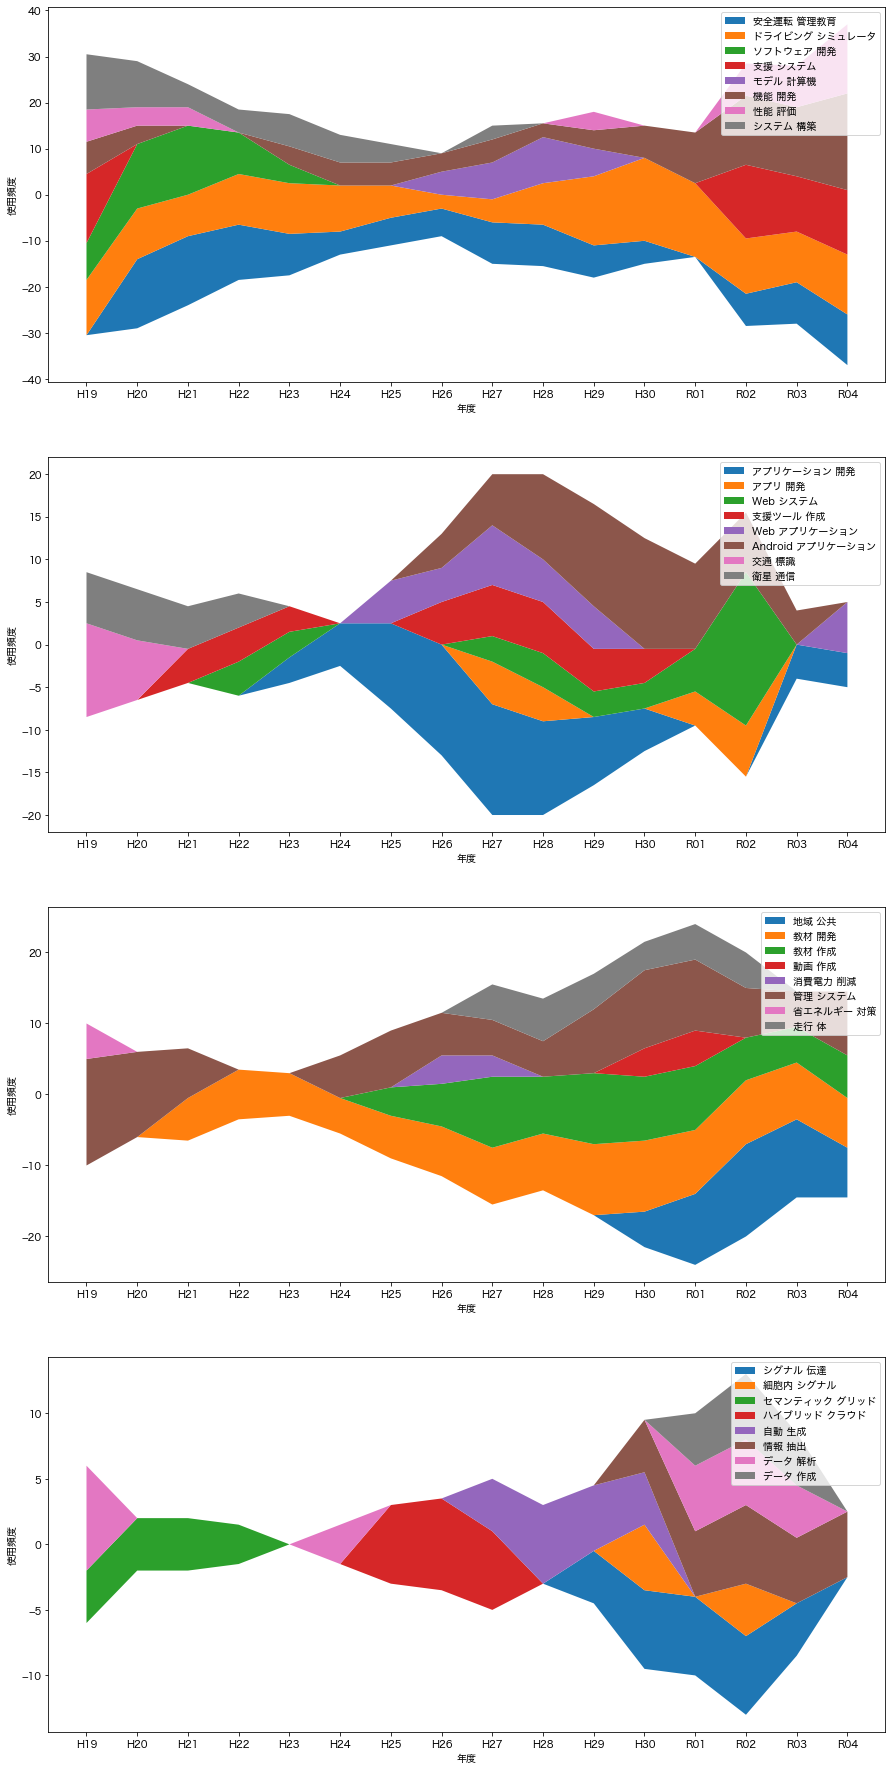

In [52]:
import matplotlib.pyplot as plt
fig = plt.figure(figsize=[15,40])
y_axis = [ [list(t)[i] for t in y ] for i,_ in enumerate(base)]


ax1 = fig.add_subplot(5,1,1)
ax2 = fig.add_subplot(5,1,2)
ax3 = fig.add_subplot(5,1,3)
ax4 = fig.add_subplot(5,1,4)

d = 8
i = 0
labels = list(base)[i:i+d]
ax1.stackplot(x, *(y_axis[i:i+d]), labels=labels, baseline='sym')
ax1.legend(loc='best')
ax1.set_xlabel('年度')
ax1.set_ylabel('使用頻度')

i += d 
labels = list(base)[i:i+d]
ax2.stackplot(x, *(y_axis[i:i+d]), labels=labels, baseline='sym')
ax2.legend(loc='best')
ax2.set_xlabel('年度')
ax2.set_ylabel('使用頻度')

i += d
labels = list(base)[i:i+d]
ax3.stackplot(x, *(y_axis[i:i+d]), labels=labels, baseline='sym')
ax3.legend(loc='best')
ax3.set_xlabel('年度')
ax3.set_ylabel('使用頻度')

i += d
labels = list(base)[i:i+d]
ax4.stackplot(x, *(y_axis[i:i+d]), labels=labels, baseline='sym')
ax4.legend(loc='best')
ax4.set_xlabel('年度')
ax4.set_ylabel('使用頻度')


plt.show()

In [17]:
import matplotlib
print(matplotlib.get_configdir())

/Users/chengk/.matplotlib


In [18]:
import matplotlib
print(matplotlib.rcParams ['font.family'])

['Hiragino sans']


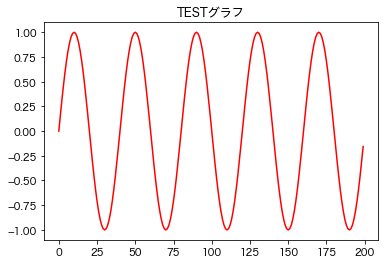

In [19]:
import numpy as np
import matplotlib.pyplot as plt
s = np.sin(np.pi*np.arange(0.0, 10.0, 0.05))
t = plt.plot(s, color='r')
plt.title("TESTグラフ")
plt.show()